# metodologia

Usaremos o *python* junto com o *jupyter*, onde facilita as aplicações e visualizações dos dados. Desta forma, para obter os graficos, precisamos encontrar como a velocidade e a posição varia com o tempo. Com isto, para resolver as EDOs, utilizameremos o _scipy_, _numpy_ e _matplotlib_ para gerar os graficos. Além disto, sempre usaremos valores na unidade internacional, desta forma, não informarei durante todo o documento, pois já foi definido logo no incio.

Todo o código-fonte está no repositorio do GitHub: <https://github.com/MarcioBulla/Movimento-de-projeteis>

## Importando bibliotecas mensionadas:

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import matplotlib as mpl

### Definindo parametros para plotar os graficos mais atraentes:

In [2]:
norm = mpl.colors.Normalize(vmin=0, vmax=90)
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.gist_rainbow)
cmap.set_array([])
cmap2 = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.rainbow)
cmap2.set_array([])
plt.rcParams["xtick.labelsize"] = 15
plt.rcParams["ytick.labelsize"] = 15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["figure.figsize"] = [12, 8]
plt.rcParams["lines.linewidth"] = 3
plt.rcParams["axes.grid"] = True
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.xmargin"] = 0
plt.rcParams["axes.ymargin"] = 0
plt.rcParams["lines.markersize"] = 10

# Questão 1
As condições iniciais são: $x(0)=z(0)=0$ e $\vec{v}(0)=v_0\hat{v}$.

Sendo $\vec{v_0} = v_0\cos{\theta}\hat{\imath} + v_0\sin{\theta}\hat{k}$

## Alternativa a

Para resolver esta questão precisamos desmembrar o vetor posição em suas componentes.
$$ m \frac{d^2\vec{r}}{dt^2} =-mg\hat{k} - c\vec{v}|\vec{v}|$$

Desta forma temos duas EDO de segunda ordem.

$$ \frac{d^2x}{dt^2} = - \frac{c}{m} \frac{dx}{dt}\sqrt{\left(\frac{dx}{dt} \right)^2 + \left(\frac{dz}{dt} \right)^2}
$$
$$\frac{d^2x}{dt^2} = - g - \frac{c}{m} \frac{dz}{dt}\sqrt{\left(\frac{dx}{dt} \right)^2 + \left(\frac{dz}{dt} \right)^2}
$$

Usaremos as função do scipe *solve_ivp*.

#### Definindo função das EDOs para resolve elas:

In [3]:
def r(t, r, g, c, m):
    x, z, vx, vz = r
    ddx = -c/m * vx * np.hypot(x, z)  # Derivada da segunda de x
    ddz = -g - c/m * vz * np.hypot(x, z)  # Derivada da segunda de z
    return [vx, vz, ddx, ddz]

Definindo condições iniciais, constantes, intervalo da solução numerica:

In [26]:
# condições iniciais
x0 = 0
z0 = 0
v0 = 30
theta = np.radians(45)
vx0 = v0*np.cos(theta)
vz0 = v0*np.sin(theta)
# constantes
g = 9.8
c = 0.5
m = 10
# Intervalo da solução
t = np.linspace(0, 5, 100, True)

Resolvendo a EDO numericamente com o metodo LSODA:

In [27]:
sol = solve_ivp(fun=r, t_span=[t[0], t[-1]], y0=[0, 0, vx0, vz0], method="LSODA", t_eval=t, args=(g, c, m))

#### Plotando grafico da posição horizontal em função do tempo:

(-0.9404243892796738, 22.213203435596427)

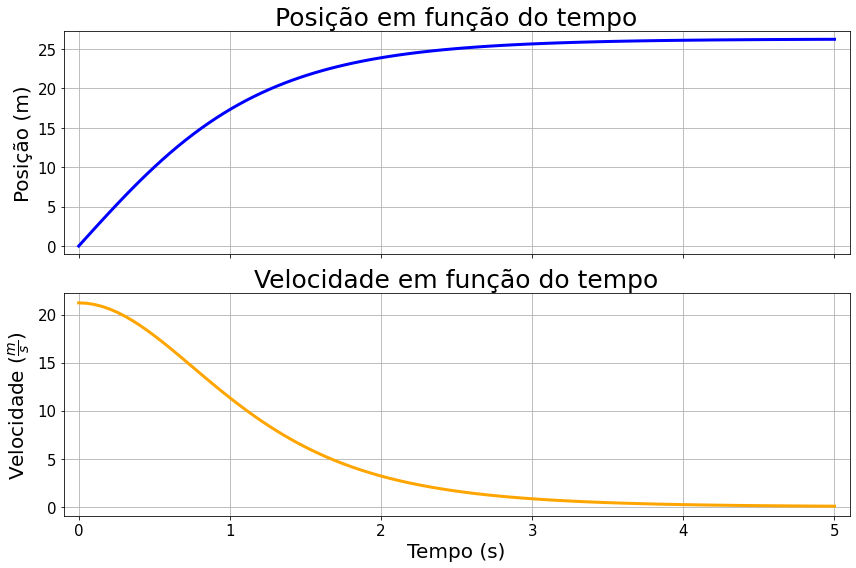

In [28]:
fig, ((x), (vx)) = plt.subplots(2, 1, sharex=True)
x.plot(sol.t, sol.y[0], label="Posição horizontal em fução do tempo", c="b")
x.set_ylabel("Posição (m)")
x.set_title("Posição em função do tempo")
x.set_ylim(sol.y[0].min()-1, sol.y[0].max()+1)

vx.plot(sol.t, sol.y[2], label="Velocidade horizontal em função do tempo", c="orange")
vx.set_xlabel("Tempo (s)")
vx.set_ylabel(r"Velocidade ($\frac{m}{s}$)")
vx.set_title("Velocidade em função do tempo")
vx.set_xlim(t[0]-.1, t[-1]+.1)
vx.set_ylim(sol.y[2].min()-1, sol.y[2].max()+1)

Grafico da velocidade em função do tempo, note que esta favoravel com o que esperamos com uma velociade tendendo a zero e a posição estaginando quando isto ocorre.

#### Plotando grafico da posição vertical em função do tempo:

(-8.349108400192053, 22.213203435596423)

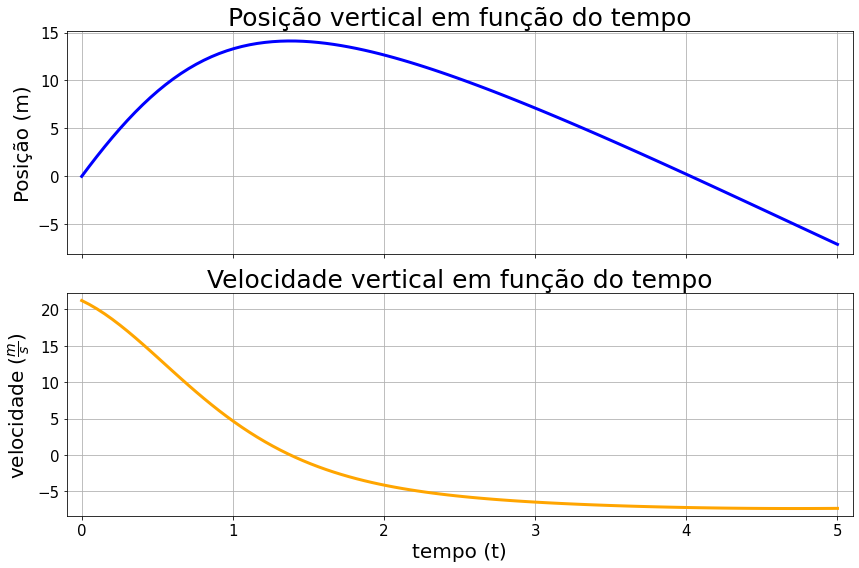

In [7]:
fig, ((z), (vz)) = plt.subplots(2, 1, sharex=True)
z.plot(sol.t, sol.y[1], c="b")
z.set_ylabel("Posição (m)")
z.set_title("Posição vertical em função do tempo")
z.set_ylim(sol.y[1].min()-1, sol.y[1].max()+1)

vz.plot(sol.t, sol.y[3], c="orange")
vz.set_ylabel(r"velocidade ($\frac{m}{s}$)")
vz.set_title("Velocidade vertical em função do tempo")
vz.set_xlabel("tempo (t)")
vz.set_xlim(t[0]-.1, t[-1]+.1)
vz.set_ylim(sol.y[3].min()-1, sol.y[3].max()+1)

Perceba que chegamos no que esperamos novamente. Pois, diferente de $x$, $z$ parte de zero e chega novamente em $0$, pelo fato que há uma aceleração descendente, porem esta ao ganhar velocidade a resistencia faz com que a velocidade convirja .

### Alternativa b

#### Para fazer varias soluçoes diferentes usaremos um *loop* onde trocaremos somente os angulos $\theta$ em um intervalo de $[0; 90]$. Desta forma, temos:

Text(0, 0.5, 'Vertical (m)')

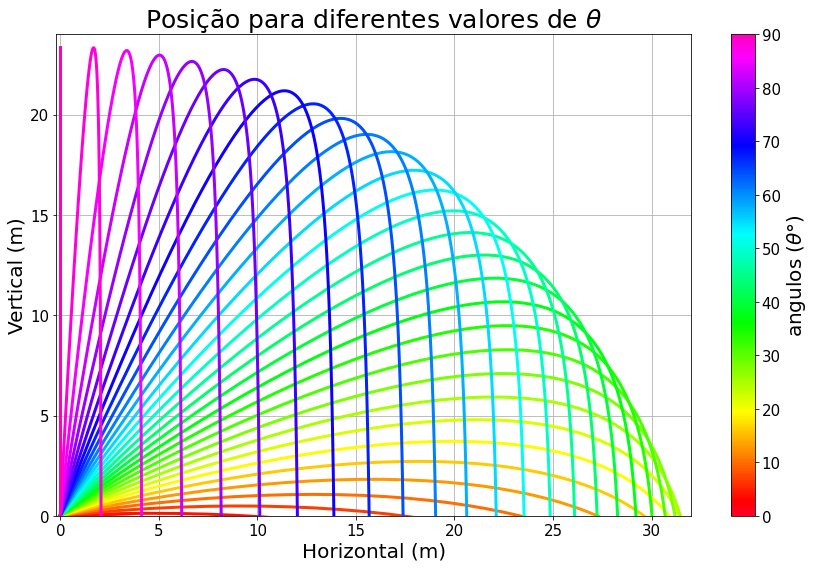

In [8]:
for _ in np.arange(0, 91, 3):  # loop variando $\theta$
    # Tranformando graus em radianos
    theta_i = np.radians(_)
    # Condições iniciais ara cada angulação
    vx0i = v0*np.cos(theta_i)
    vz0i = v0*np.sin(theta_i)
    # Solução para cada eixo
    sol_i = solve_ivp(r, [t[0], t[-1]], [x0, z0, vx0i, vz0i], "LSODA", t, args=(g, c, m))
    # Plotagem do grafico para cada theta
    plt.plot(sol_i.y[0], sol_i.y[1], c=cmap.to_rgba(_ + 1))


plt.colorbar(cmap, ticks=np.arange(0, 95, 10), label=r"angulos ($\theta$°)")
plt.xlim(-.2, 32)
plt.ylim(0, 24)
plt.title(r"Posição para diferentes valores de $\theta$")
plt.xlabel("Horizontal (m)")
plt.ylabel("Vertical (m)")

Note que, o alcanse máximo fica proximo aos 25° graus, menor que os 45° graus no caso de sem resistencia do ar. Isto ocorre, pois, quanto mais tempo durar o percurso mais ele será desacelerado pela resistencia do ar, além disso, para ele se manter mais tempo ele deve se angular mais, logo, perdendo velocidade horizontal. Conclusão, quando maior for o fator da resistencia do ar, menor será o angulo para o alcace maximo.

### Alternativa c

Podemos agrupar estes pontos usaremo o parametro *event* da função *solve_ivp*. Esta função encontrara os demais valores, onde a variavel de nosso interesse é zero. Desta forma, pegamos os ponto onde $\frac{dz}{dt}=0$, ou seja o poto onde $z$ é máximo e $z=0$ onde a particula esta no chão, logo podemos adiquirir o maximo alcance. 

#### Definindo as funções onde queremos capturar os pontos:

In [33]:
def topo(t, r, g, c, m):  # Função para capturar pontos, no qual a velocidade em z é zero
    x, z, vx, vz = r
    return vz


def alcance(t, r, g, c, m):  # Função para capturar pontos, no qual o valor z é zero
    x, z, vx, vz = r
    return z

#### Fazendo soluções para varios $\theta$ igual o que foi feito no grafico anterio, porem com mais pontos:

In [35]:
pontos = np.array([[], [], []])  # Criando array para recolher os pontos

for _ in np.linspace(0, 90, 200, True):  # loop variando $\theta$
    # Tranformando graus em radianos
    theta_i = np.radians(_)
    # Condições iniciais para cada angulação
    vz0i = v0*np.sin(theta_i)
    vx0i = v0*np.cos(theta_i)
    # Solução do eixos x e z
    sol_i = solve_ivp(fun=r, t_span=[t[0], t[-1]], y0=[x0, z0, vx0i, vz0i], method="LSODA", t_eval=t, args=(g, c, m), events=(topo, alcance), dense_output=True)
    # Recolhendo somente os pontos de interesse gerados pela soção
    pontos = np.append(pontos, [[_], sol_i.y_events[0][:, 1], [
        sol_i.y_events[1][:, 0][1] if _ not in [0, 90] else sol_i.y_events[1][:, 0][0]]], 1)
    # note que foi feito uma condição para as situações, onde há somente uma raiz para z = 0

#### Plotando grafico da altura e alcance maximo em função do angulo:

Text(0, 0.5, 'Alcance máximo (m)')

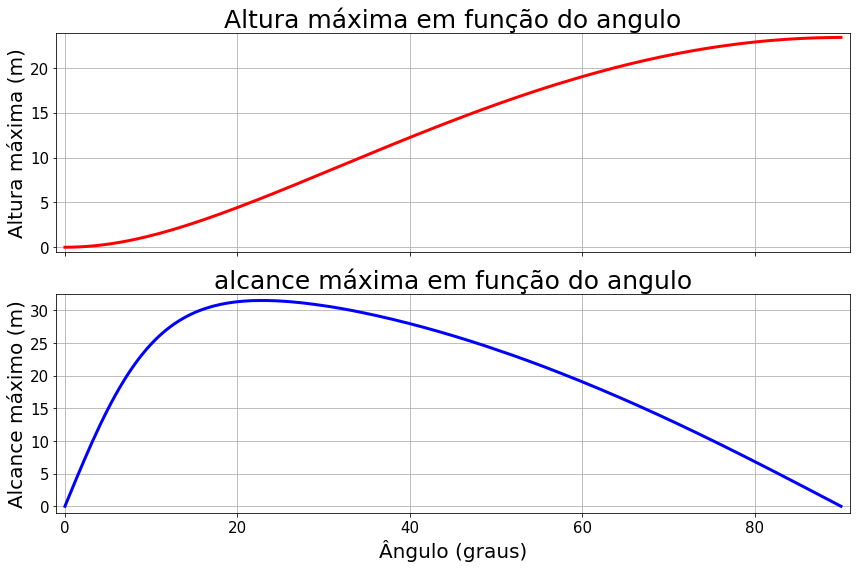

In [36]:
fig, ((ax1), (ax2)) = plt.subplots(2, 1, sharex=True)

ax1.plot(pontos[0], pontos[1], c="r")
ax1.set_title("Altura máxima em função do angulo")
ax1.set_ylim(pontos[1].min()-.5, pontos[1].max()+.5)
ax1.set_ylabel("Altura máxima (m)")

ax2.plot(pontos[0], pontos[2], c="b")
ax2.set_xlim(pontos[0][0]-1, pontos[0][-1]+1)
ax2.set_title("alcance máxima em função do angulo")
ax2.set_ylim(pontos[2].min()-1, pontos[2].max()+1)
ax2.set_xlabel("Ângulo (graus)")
ax2.set_ylabel("Alcance máximo (m)")

# Questão 2

Semelhante a questão anterior, porem agora com vento. Ou seja, teremos mais duas contantes interagindo na equação, uma para o eixo $x$ e outra para o $z$. Desta forma, temos:
$$\vec{v}_{rel} =\vec{v} - \vec{v}_w $$
onde $\vec{v_w} = u\hat{\imath} + w\hat{k}$.

As condições iniciais são as mesmas.

## Alternativa a

Para resolver esta questão precisamos desmembrar a o vetor posição em suas componetes.
$$ m \frac{d^2\vec{r}}{dt^2} =-mg\hat{k} - c\vec{v}_{rel}|\vec{v}_{rel}|$$

Desta forma temos duas EDO de segunda ordem.

$$ \frac{d^2x}{dt^2} = - \frac{c}{m} \left(\frac{dx}{dt}-u\right) \sqrt{\left(\frac{dx}{dt}-u \right)^2 + \left(\frac{dz}{dt} - w \right)^2}
$$
$$ \frac{d^2x}{dt^2} = - \frac{c}{m} \left(\frac{dz}{dt}-w\right) \sqrt{\left(\frac{dx}{dt}-u \right)^2 + \left(\frac{dz}{dt} - w \right)^2}
$$

#### Definindo função das EDOs para resolve elas:

In [12]:
def r_v(t, r, g, c, m, u, w):
    x, z, vx, vz = r
    # Derivada da segunda de x
    ddx = - c/m * (vx - u) * np.hypot(vx - u, vz - w)
    # Derivada da segunda de z
    ddz = - g - c/m * (vz - w) * np.hypot(vx - u, vz - w)
    return [vx, vz, ddx, ddz]

#### Definindo condições iniciais e constantes e valores da solução:

In [38]:
# CondiçÕes iniciais
x0 = 0
z0 = 0
v0 = 30
theta = np.pi/4
vx0 = v0*np.cos(theta)
vz0 = v0*np.sin(theta)
# Constantes
g = 9.8
c = 3
m = 5
u = 1
w = -2
# Intervalo da solução
t = np.linspace(0, 8, 300, True)

#### Resolvendo a EDO numericamente com o metodo LSODA:

In [39]:
sol_v = solve_ivp(fun=r_v, t_span=[t[0], t[-1]], y0=[x0, z0, vx0, vz0], args=(
    g, c, m, u, w), t_eval=t, method="LSODA")

#### Plotando grafico da solução para valecidade e posição horizontal:

(-3.204101373133206e-05, 22.213203435596427)

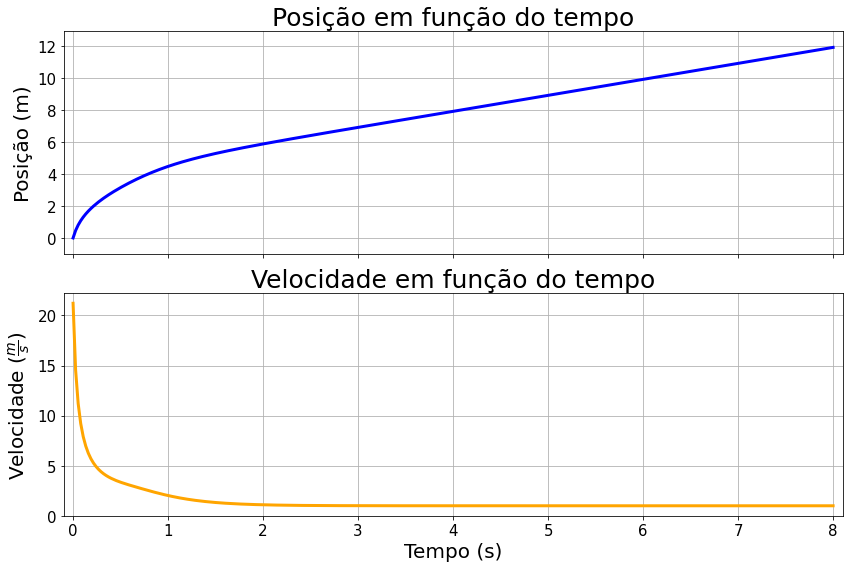

In [15]:
fig, ((xu), (vxu)) = plt.subplots(2, 1, sharex=True)
xu.plot(sol_v.t, sol_v.y[0], label="Posição em fução do tempo", c="b")
xu.set_ylabel("Posição (m)")
xu.set_title("Posição em função do tempo")
xu.set_ylim(sol_v.y[0].min() - 1, sol_v.y[0].max()+1)

vxu.plot(sol_v.t, sol_v.y[2], label="Velocidade em função do tempo", c="orange")
vxu.set_xlabel("Tempo (s)")
vxu.set_ylabel(r"Velocidade ($\frac{m}{s}$)")
vxu.set_title("Velocidade em função do tempo")
vxu.set_xlim(t[0]-.1, t[-1]+.1)
vxu.set_ylim(sol_v.y[2].min() - 1, sol_v.y[2].max()+1)

No grafico da velocidade em função do tempo, note que esta favor avel com o que esperamos com uma velociade tendendo a velocidade do vento. Visto que o vento vai desacelerar ou acelerar o projetil por meio da resistencia do ar. Note que, como há velocidade favoravel ao movimento a posição sempre aumentara, o que não ocorreria se não ouvesse vento ou se tivesse um vento contrario, no qual mudaria o sentido da trajetoria horizontal.

#### Plotando grafico da posição vertical em função do tempo:

(-7.045712941778493, 22.213203435596423)

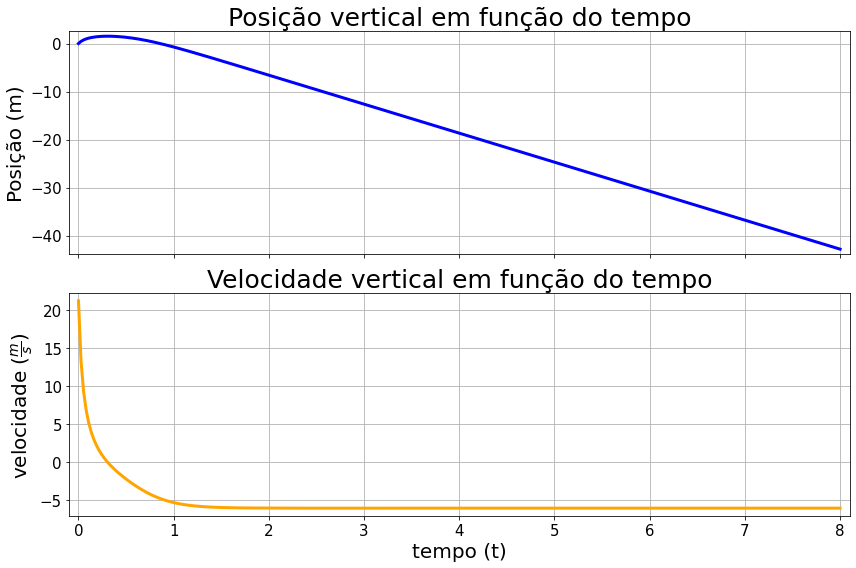

In [16]:
fig, ((zw), (vzw)) = plt.subplots(2, 1, sharex=True)
zw.plot(sol_v.t, sol_v.y[1], c="b")
zw.set_ylabel("Posição (m)")
zw.set_title("Posição vertical em função do tempo")
zw.set_ylim(sol_v.y[1].min() - 1, sol_v.y[1].max()+1)

vzw.plot(sol_v.t, sol_v.y[3], c="orange")
vzw.set_ylabel(r"velocidade ($\frac{m}{s}$)")
vzw.set_title("Velocidade vertical em função do tempo")
vzw.set_xlabel("tempo (t)")
vzw.set_xlim(t[0]-.1, t[-1]+.1)
vzw.set_ylim(sol_v.y[3].min() - 1, sol_v.y[3].max()+1)

Como a velocidade do vento vertical é descendente, perceba que o projetil desacelera mais rapidade e acelera em movimento descendente mais rapido. Desta forma, causara uma queda do projetil em menos tempo. Além disso, observe que a velocidade em $z$ também converge, pois quanto maior a velocidade maior será a influencia da resistencia do ar. Aponto onde se igualarão, ou seja a posição em função do tempo será linear.

## Alternativa b

Como o objetivo é pegar divesas combinações entre $\theta$, $u$ e $w$. Sabendo disto usaremos a função *random.randint* para aleatorizar as escolhas das constantes $u$ e $w$ variando $\theta$ entre $[5,85]$. Desta forma, temos:

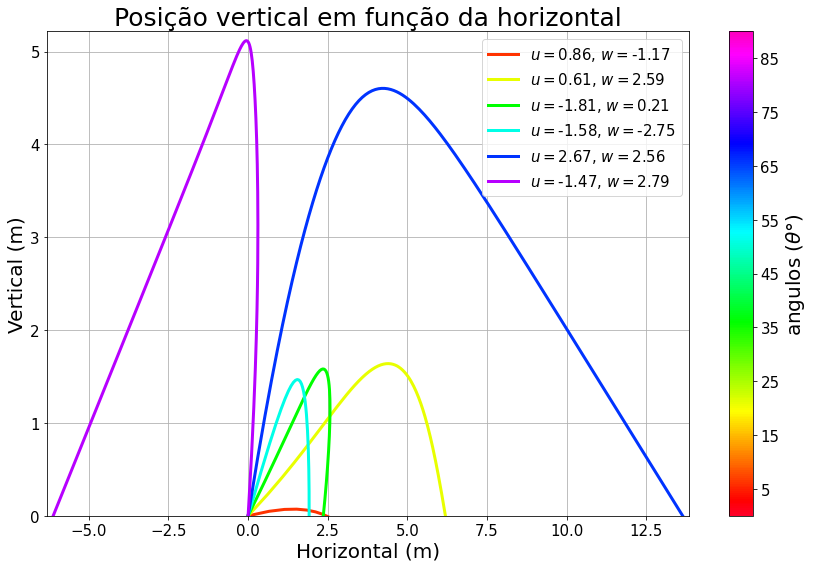

In [17]:
# Função para capturar pontos, no qual a velocidade em z é zero
def topo_uw(t, r, g, c, m, u, w):
    x, z, vx, vz = r
    return vz


# Função para capturar pontos, no qual z é zero
def alcanse_uw(t, r, g, c, m, u, w):
    x, z, vx, vz = r
    return z


# arrays para agrupar os pontos, para fazer um auto limite no grafico
chao = np.array([])
topo = np.array([])


for _ in np.arange(5, 90, 15):
    theta_i = np.radians(_)
    u, w = np.random.uniform(-3, 3, 2)
    vx0i = v0*np.cos(theta_i)
    vz0i = v0*np.sin(theta_i)
    sol_vi = solve_ivp(fun=r_v, t_span=[t[0], t[-1]], y0=[x0, z0, vx0i, vz0i], args=(g, c, m, u, w), t_eval=t, method="LSODA", events=(alcanse_uw, topo_uw))
    # Recolhendo os pontos
    chao = np.append(chao, sol_vi.y_events[0][:, 0])
    topo = np.append(topo, sol_vi.y_events[1][:, 1])
    plt.plot(sol_vi.y[0], sol_vi.y[1], label=r"$u=$"f"{u:.2f},"+r" $w=$"f"{w:.2f}", c=cmap.to_rgba(_ + 1))

plt.colorbar(cmap, ticks=np.arange(5, 95, 10), label=r"angulos ($\theta$°)")
# usando os pontos para ajustar plotagem automatico
plt.xlim(chao.min()-.2, chao.max()+.2)
plt.ylim(0, topo.max()+.1)
plt.title("Posição vertical em função da horizontal")
plt.xlabel("Horizontal (m)")
plt.ylabel("Vertical (m)")
plt.legend()

Note que para angulos menores o alcance e altura são mais consistentes. Pois, quanto menos tempo o projetil fica no ar, menos tempo ele sera influenciado pela resistencia do ar. Além disso, como as entradas de velocidade de vento são aletorias dentro um intervalo de $[-1; 3]$ há momentos que o vento corrobora com a velocidade vertival, de modo que mantem o projetil por mais tempo no ar. Desta forma, fazendo com que o vento horizontal leve o projetio para pontos antes do lançamento. Contudo isto só ocorre para angulos maiores, pois, como foi dido há mais tempo para a resistencia do vento interferir e neste caso há menos velocidade horizontal. Ou seja, facilita o projetil voltar.

Com o link do GitHub pode-se testar esta geração rondomizada. Note que, o grafico se ajusta automaticamente para a melhor representação.

# Questão 3

Semelhante as questões anteriores, porem agora com a resistencia do ar variando. Ou seja, teremos um comportamento diferente, pois quanto mais alto a particula estiver, menor será a resistencia do ar. E com isto, freando menos.

O fator com que a resistencia do ar diminui é descrita por:
$$e^{-\frac{z}{h}}$$ 

As condições iniciais são as mesmas.

## Alternativa (a)

Como a resistencia do ar varia em função da altura precisamos aplicar em ambas as equaçoes do movimentom.

$$ \frac{d^2x}{dt^2} = - \frac{c}{m} \frac{dx}{dt}\sqrt{\left(\frac{dx}{dt} \right)^2 + \left(\frac{dz}{dt} \right)^2} e^{-z/h}
$$
$$\frac{d^2x}{dt^2} = - g - \frac{c}{m} \frac{dz}{dt}\sqrt{\left(\frac{dx}{dt} \right)^2 + \left(\frac{dz}{dt} \right)^2} e^{-z/h}
$$


#### Definindo função par resolver as EDOs:

In [18]:
def r_h(t, r, g, c, m, h):
    x, z, vx, vz = r
    ddx = - c/m * vx * np.exp(-z/h) * np.hypot(x, z)
    ddz = -g - c/m * vz * np.exp(-z/h) * np.hypot(x, z)
    return [vx, vz, ddx, ddz]

#### Definindo condições iniciais, constantes, intervalo da solução numerica:

In [41]:
# condições iniciais
x0 = 0
z0 = 0
v0 = 30
theta = np.radians(45)
vx0 = v0*np.cos(theta)
vz0 = v0*np.sin(theta)
# constantes
g = 9.8
c = 1.3
m = 5
h = 4
# Intervalo da solução
t = np.linspace(0, 7, 200, True)

#### Resolvendo a EDO numericamente com o metodo LSODA:

In [42]:
sol_e = solve_ivp(fun=r_h, t_span=[t[0], t[-1]], y0=[x0, x0, vx0, vz0], method="LSODA", t_eval=t, args=(g, c, m, h))

#### Plotando grafico da posição horizontal em função do tempo:

(-1.000000526476611, 22.213203435596427)

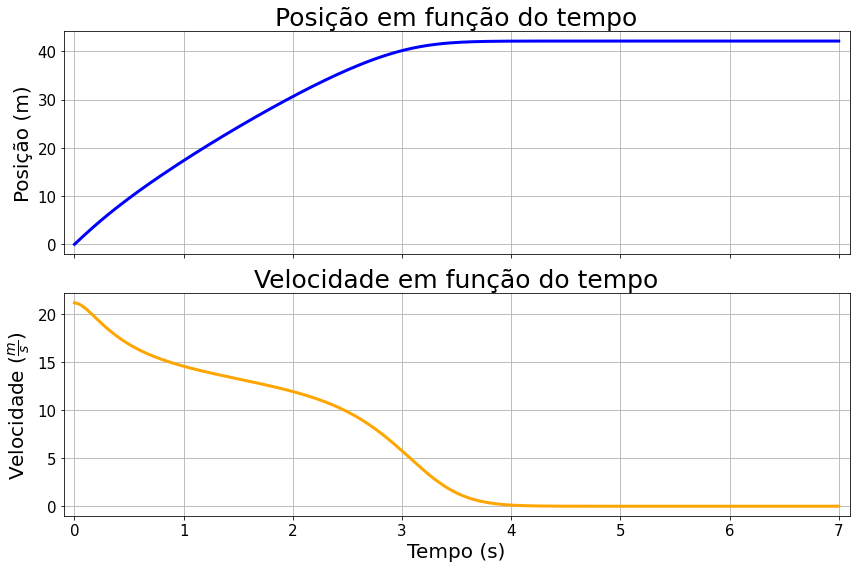

In [43]:
fig, ((x), (vx)) = plt.subplots(2, 1, sharex=True)
x.plot(sol_e.t, sol_e.y[0], label="Posição em fução do tempo", c="b")
x.set_ylabel("Posição (m)")
x.set_title("Posição em função do tempo")
x.set_ylim(sol_e.y[0].min()-2, sol_e.y[0].max()+2)

vx.plot(sol_e.t, sol_e.y[2], label="Velocidade em função do tempo", c="orange")
vx.set_xlabel("Tempo (s)")
vx.set_ylabel(r"Velocidade ($\frac{m}{s}$)")
vx.set_title("Velocidade em função do tempo")
vx.set_xlim(t[0]-.1, t[-1]+.1)
vx.set_ylim(sol_e.y[2].min()-1, sol_e.y[2].max()+1)

ESCREVER SOBRE

#### Plotando grafico da posição vertical em função do tempo:

(-9.39469841116954, 22.213203435596423)

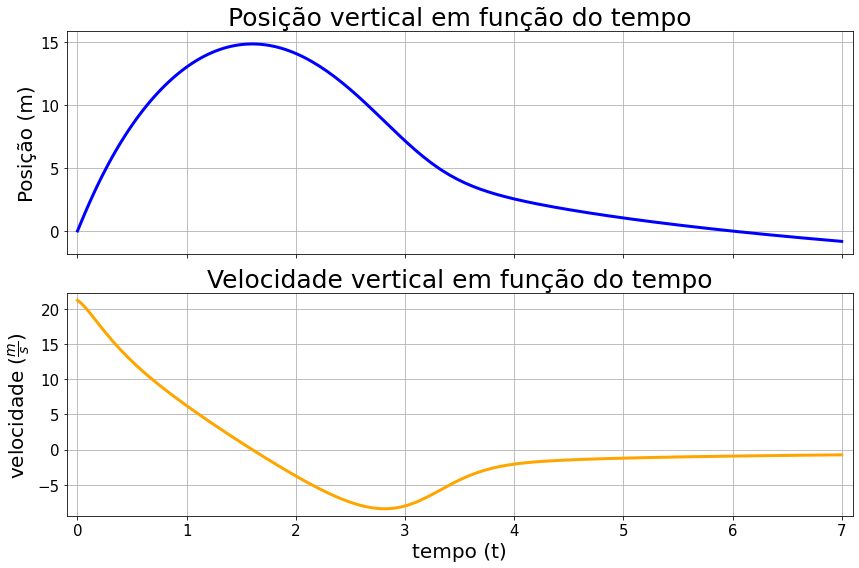

In [44]:
fig, ((z), (vz)) = plt.subplots(2, 1, sharex=True)
z.plot(sol_e.t, sol_e.y[1], c="b")
z.set_ylabel("Posição (m)")
z.set_title("Posição vertical em função do tempo")
z.set_ylim(sol_e.y[1].min()-1, sol_e.y[1].max()+1)

vz.plot(sol_e.t, sol_e.y[3], c="orange")
vz.set_ylabel(r"velocidade ($\frac{m}{s}$)")
vz.set_title("Velocidade vertical em função do tempo")
vz.set_xlabel("tempo (t)")
vz.set_xlim(t[0]-.1, t[-1]+.1)
vz.set_ylim(sol_e.y[3].min()-1, sol_e.y[3].max()+1)

ESCREVER SOBRE

Text(0, 0.5, 'Vertical (m)')

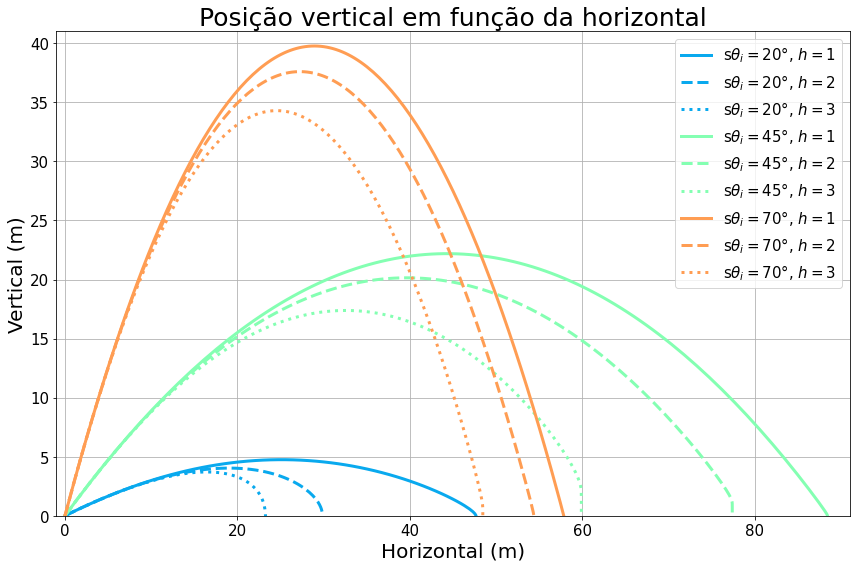

In [46]:
# Lista de estilos de linha para diferencialas por angulo
selectstyle = ["solid", "dashed", "dotted"]

for _ in np.linspace(20, 70, 3, True):
    for __ in np.arange(1, 4):
        h = __
        theta_i = np.radians(_)
        vx0i = v0*np.cos(theta_i)
        vz0i = v0*np.sin(theta_i)
        sol_ei = solve_ivp(fun=r_h, t_span=[t[0], t[-1]], y0=[x0, z0, vx0i, vz0i], method="LSODA",t_eval=t, args=(g, c, m, h))
        plt.plot(sol_ei.y[0], sol_ei.y[1], label=r"s$\theta _i=$" + f"{_:.0f}°"+r", $h=$"+f"{__:.0f}", c=cmap2.to_rgba(_ + 1), linestyle=selectstyle[__-1])

plt.legend()
plt.xlim(-1, 91)
plt.ylim(0, 41)
plt.title("Posição vertical em função da horizontal")
plt.xlabel("Horizontal (m)")
plt.ylabel("Vertical (m)")

Note que quando maior for $h$ menos incluencia a variação da resistencia do ar, pois a exponicial diminui mais lentamente e por isto o alcance menor para menores valores de $h$. Além disto, como em altitude maiores a resistencia do ar é menor o formato do grafico ficam mais abertos, pois, como a resitencia é  é menor a desaceleração diminui.